<a href="https://colab.research.google.com/github/vikasyankanchi/0000/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Sample raw data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Bob', None,'Alice'],
    'Age': [25, None, 35, 30, 22,25],
    'City': ['Delhi', 'Mumbai', 'Bangalore', 'Mumbai', 'Pune','Delhi']
}

df = pd.DataFrame(data)

# Show original data
print("Original Data:")
print(df)

# 1. Remove duplicates
df = df.drop_duplicates()

# 2. Remove rows with missing names
df = df.dropna(subset=['Name'])

# 3. Fill missing age with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

print("\nCleaned Data:")
print(df)


Original Data:
      Name   Age       City
0    Alice  25.0      Delhi
1      Bob   NaN     Mumbai
2  Charlie  35.0  Bangalore
3      Bob  30.0     Mumbai
4     None  22.0       Pune
5    Alice  25.0      Delhi

Cleaned Data:
      Name   Age       City
0    Alice  25.0      Delhi
1      Bob  30.0     Mumbai
2  Charlie  35.0  Bangalore
3      Bob  30.0     Mumbai


In [29]:
import pandas as pd

df = pd.read_csv('data.csv')

# Check structure and completeness
df.info()

# Summary statistics
df.describe(include='all')

# Check for duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


np.int64(0)

In [13]:
import pandas as pd

data = {
    'ID': [1, 2, 2, 4, 5,2],
    'Age': [25, 30, 30, -5, 200,30],
    'Gender': ['Male', 'male', 'Male', 'F', 'Unknown','male'],
    'Salary': [4000, None, 4000, 5000, -3000,None]
}
df = pd.DataFrame(data)
print(df)

   ID  Age   Gender  Salary
0   1   25     Male  4000.0
1   2   30     male     NaN
2   2   30     Male  4000.0
3   4   -5        F  5000.0
4   5  200  Unknown -3000.0
5   2   30     male     NaN


In [14]:
df.duplicated().sum()          # Count duplicates
df[df.duplicated()]

,ID,Age,Gender,Salary
5,2,30,male,NaN


count      6.000000
mean      51.666667
std       73.936910
min       -5.000000
25%       26.250000
50%       30.000000
75%       30.000000
max      200.000000
Name: Age, dtype: float64


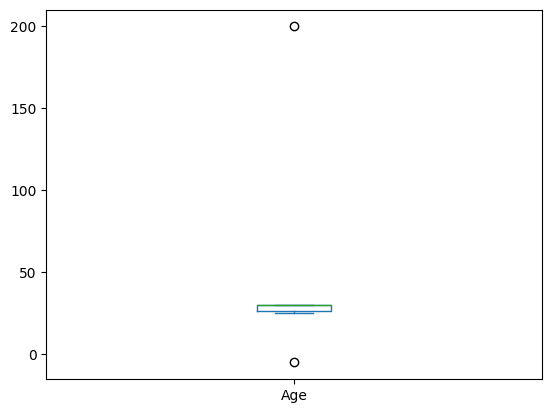

In [15]:
# Use describe to find extreme values
print(df['Age'].describe())

# Use boxplot for visual outliers
import matplotlib.pyplot as plt
df['Age'].plot.box()
plt.show()

In [16]:
# Check for inconsistent gender entries
print(df['Gender'].value_counts())

# Fix known inconsistencies
df['Gender'] = df['Gender'].replace({'male': 'Male', 'F': 'Female', 'Unknown': None})

# Invalid salary (e.g., negative)
print(df[df['Salary'] < 0])

Gender
Male       2
male       2
F          1
Unknown    1
Name: count, dtype: int64
   ID  Age Gender  Salary
4   5  200   None -3000.0


In [17]:
df.isna().sum()

,0
ID,0
Age,0
Gender,1
Salary,2


In [18]:
import pandas as pd

# Sample data with missing values
data = {
    'Name': ['Alice', 'Bob', None, 'Eve'],
    'Age': [25, None, 30, 22],
    'City': ['Delhi', 'Mumbai', 'Bangalore', None]
}

df = pd.DataFrame(data)

# Use .info() to check non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      float64
 2   City    3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [19]:
print(df.isna())

    Name    Age   City
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True


In [20]:
# Count missing values per column
print(df.isna().sum())

Name    1
Age     1
City    1
dtype: int64


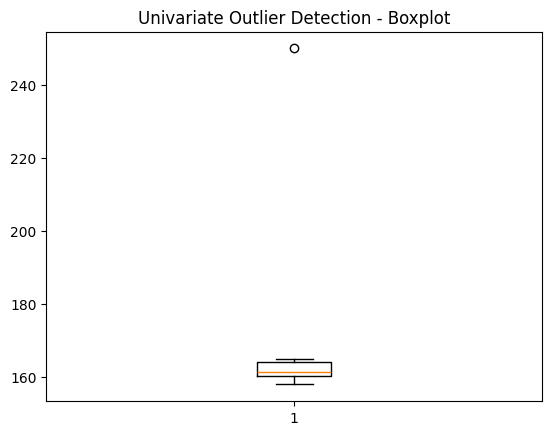

Outliers: [250]


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.Series([160, 162, 158, 165, 161, 250])  # height in cm

# Boxplot
plt.boxplot(data)
plt.title("Univariate Outlier Detection - Boxplot")
plt.show()

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
print("Outliers:", outliers.values)

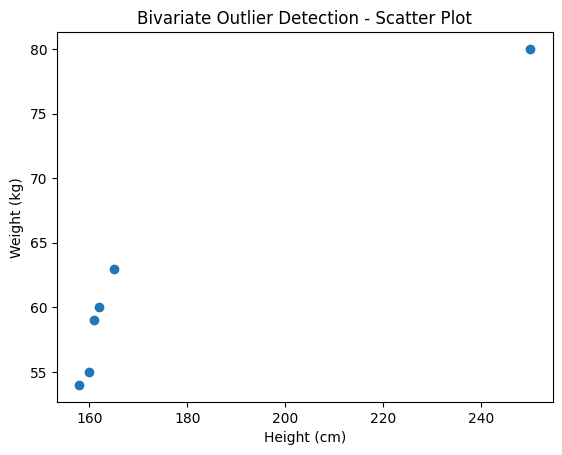

In [5]:
import matplotlib.pyplot as plt
import numpy as np

height = np.array([160, 162, 158, 165, 161, 250])
weight = np.array([55, 60, 54, 63, 59, 80])

plt.scatter(height, weight)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Bivariate Outlier Detection - Scatter Plot")
plt.show()

/tmp/ipython-input-3994892872.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=12, freq='M')


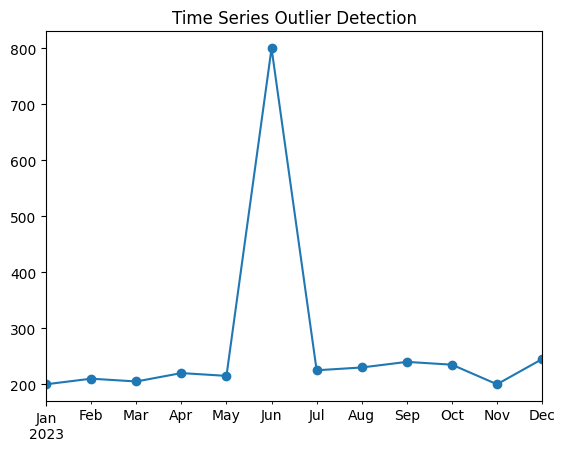

Outliers in time series:
 2023-06-30    800
Freq: ME, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales = pd.Series([200, 210, 205, 220, 215, 800, 225, 230, 240, 235,200, 245], index=dates)

sales.plot(marker='o', title="Time Series Outlier Detection")
plt.show()

# Simple detection: mean ± 3*std
mean = sales.mean()
std = sales.std()
outliers = sales[(sales > mean + 3*std) | (sales < mean - 3*std)]
print("Outliers in time series:\n", outliers)

In [7]:
import pandas as pd
data = pd.Series([5, 6, 7, 8, 100])  # Example data

# Capping at 5th and 95th percentiles
lower_cap = data.quantile(0.05)
upper_cap = data.quantile(0.95)

capped_data = data.clip(lower=lower_cap, upper=upper_cap)
print(capped_data)

0     5.2
1     6.0
2     7.0
3     8.0
4    81.6
dtype: float64


In [8]:
import numpy as np
data = pd.Series([10, 12, 15, 20, 200])
log_data = np.log(data)
print(log_data)

0    2.302585
1    2.484907
2    2.708050
3    2.995732
4    5.298317
dtype: float64


In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Keep only non-outliers
filtered_data = data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]
print(filtered_data)

0    10
1    12
2    15
3    20
dtype: int64


In [10]:
import pandas as pd

# Dataset A: Customer basic info
data_a = {
    'Customer_ID': [101, 102, 103],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}
df_a = pd.DataFrame(data_a)

# Dataset B: Customer address info
data_b = {
    'Customer_ID': [101, 102, 104],  # Note: ID 104 not in Dataset A
    'Address': ['New York', 'Los Angeles', 'Chicago']
}
df_b = pd.DataFrame(data_b)

print("Dataset A:")
print(df_a)
print("\nDataset B:")
print(df_b)

# ----- Adding Attributes (Merge Columns) -----
# Merge on Customer_ID to add Address to Dataset A
df_merge = pd.merge(df_a, df_b, on='Customer_ID', how='left')
print("\nAfter Adding Attributes (Address column):")
print(df_merge)

# ----- Adding Data Objects (Adding new rows) -----
# Find rows in Dataset B not in Dataset A
df_new_customers = df_b[~df_b['Customer_ID'].isin(df_a['Customer_ID'])]

# Create full info for new customers (for simplicity, fill missing columns)
df_new_customers = df_new_customers.assign(Name=['David'], Age=[28])

# Append the new rows
df_final = pd.concat([df_merge, df_new_customers], ignore_index=True)
print("\nAfter Adding Data Objects (new customers):")
print(df_final)

Dataset A:
   Customer_ID     Name  Age
0          101    Alice   25
1          102      Bob   30
2          103  Charlie   35

Dataset B:
   Customer_ID      Address
0          101     New York
1          102  Los Angeles
2          104      Chicago

After Adding Attributes (Address column):
   Customer_ID     Name  Age      Address
0          101    Alice   25     New York
1          102      Bob   30  Los Angeles
2          103  Charlie   35          NaN

After Adding Data Objects (new customers):
   Customer_ID     Name  Age      Address
0          101    Alice   25     New York
1          102      Bob   30  Los Angeles
2          103  Charlie   35          NaN
3          104    David   28      Chicago


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---- Sample Dataset ----
data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6],
    'Age': [25, 30, 45, 40, 35, 50],
    'Annual_Income': [30000, 40000, 50000, 60000, 55000, 65000],
    'Spending_Score': [60, 70, 80, 50, 65, 90]
}
df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

# ----------------------------------------------------
# 1️⃣ NUMEROSITY DATA REDUCTION
# ----------------------------------------------------

# Example: Aggregation - Grouping customers into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '31-40', '41-50', '51-60'])
numerosity_reduced = df.groupby('Age_Group').agg({
    'Annual_Income': 'mean',
    'Spending_Score': 'mean'
}).reset_index()

print("\nNumerosity Reduction (Aggregation by Age Group):")
print(numerosity_reduced)

# ----------------------------------------------------
# 2️⃣ DIMENSIONALITY DATA REDUCTION
# ----------------------------------------------------

# Select only numeric columns for PCA
features = ['Age', 'Annual_Income', 'Spending_Score']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce from 3D → 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
dimensionality_reduced = pd.concat([df['Customer_ID'], pca_df], axis=1)

print("\nDimensionality Reduction (PCA - 2 Principal Components):")
print(dimensionality_reduced)

Original Dataset:
   Customer_ID  Age  Annual_Income  Spending_Score
0            1   25          30000              60
1            2   30          40000              70
2            3   45          50000              80
3            4   40          60000              50
4            5   35          55000              65
5            6   50          65000              90

Numerosity Reduction (Aggregation by Age Group):
  Age_Group  Annual_Income  Spending_Score
0     20-30        35000.0            65.0
1     31-40        57500.0            57.5
2     41-50        57500.0            85.0
3     51-60            NaN             NaN

Dimensionality Reduction (PCA - 2 Principal Components):
   Customer_ID       PC1       PC2
0            1 -2.277760  0.508705
1            2 -1.037030  0.611540
2            3  0.973598  0.593624
3            4 -0.018367 -1.709020
4            5 -0.099809 -0.467135
5            6  2.459368  0.462285


/tmp/ipython-input-2426138196.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  numerosity_reduced = df.groupby('Age_Group').agg({


In [34]:
import pandas as pd
df = pd.read_csv("/content/train.csv", usecols=['annotation_id','annotator','audio'])
df

,annotation_id,annotator,audio
0,6,1,/data/upload/1/4b590dec-7EHI0j4rqMc.mp3
1,9,1,/data/upload/5/c37ce9c1-JPOd9MGlH-A.mp3
2,10,1,/data/upload/5/9144b5a8-6NgSiqY7Cxw.mp3
3,11,1,/data/upload/5/269dcce2-mmDgw2hF-eo.mp3
4,12,1,/data/upload/5/d3886e88-RJUqcQB9w4k.mp3
5,14,1,/data/upload/5/c2aa07c2-JapHB2pbwEg.mp3
6,13,1,/data/upload/5/1395a2b2-jducfLQJLPg.mp3
7,15,1,/data/upload/5/9f7ad91b-0n8CJZtbvt0.mp3
8,16,1,/data/upload/5/e70026e3-3rHwn8ALua4.mp3
9,18,1,/data/upload/5/7ef25982-k2sX2YU_NBE.mp3


In [22]:
df.isnull().sum()

,0
Name,1
Age,1
City,1


In [23]:
new_df = df.fillna(0)
new_df

,Name,Age,City
0,Alice,25.0,Delhi
1,Bob,0.0,Mumbai
2,0,30.0,Bangalore
3,Eve,22.0,0


In [24]:
new_df = df.fillna(method="ffill")
new_df

/tmp/ipython-input-2534372125.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = df.fillna(method="ffill")


,Name,Age,City
0,Alice,25.0,Delhi
1,Bob,25.0,Mumbai
2,Bob,30.0,Bangalore
3,Eve,22.0,Bangalore


In [25]:
new_df = df.fillna(method="bfill")
new_df

/tmp/ipython-input-200175317.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = df.fillna(method="bfill")


,Name,Age,City
0,Alice,25.0,Delhi
1,Bob,30.0,Mumbai
2,Eve,30.0,Bangalore
3,Eve,22.0,None


In [26]:
new_df = df.interpolate()
df

/tmp/ipython-input-89677104.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  new_df = df.interpolate()


,Name,Age,City
0,Alice,25.0,Delhi
1,Bob,NaN,Mumbai
2,None,30.0,Bangalore
3,Eve,22.0,None


In [27]:
new_df = df.dropna()
new_df

,Name,Age,City
0,Alice,25.0,Delhi


In [28]:
new_df = df.dropna(how='all')
new_df

,Name,Age,City
0,Alice,25.0,Delhi
1,Bob,NaN,Mumbai
2,None,30.0,Bangalore
3,Eve,22.0,None


In [32]:
import pandas as pd
# Read the CSV file without specifying usecols to inspect the columns
df_temp = pd.read_csv("/content/train.csv")
print(df_temp.columns)

Index(['annotation_id', 'annotator', 'audio', 'created_at', 'id', 'label',
       'lead_time', 'updated_at'],
      dtype='object')
